# Add new datafram in an existing datafram

1. `concat()`: A pandas function that combines data either by adding it horizontally as new columns for existing rows, or vertically as new rows for existing columns.
2. `merge()`: A pandas function that joins two dataframes together; it only combines data by extending along axis one horizontally. Combine on **column name**
3. `join()`: Join columns with other dataframe either on **index** or on a key column. Efficiently join multiple DataFrame objects by index at once by passing a list.

`axis=1` columns
`axis=0` rows

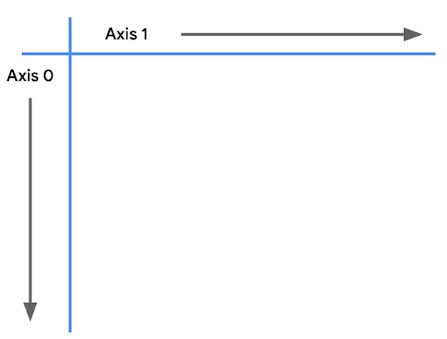

In [3]:
import numpy as np
import pandas as pd

data = {'planet':['Mercury','Venus','Earth','Mars'],
        'radius_km':[2440,6052,6371,3390],
        'moons':[0,0,1,2],
        }

df1 = pd.DataFrame(data)
df1

,planet,radius_km,moons
0,Mercury,2440,0
1,Venus,6052,0
2,Earth,6371,1
3,Mars,3390,2


In [4]:
data = {'planet':['Jupiter','Saturn','Uranus','Neptune'],
        'radius_km':[69911,58232,25362,24622],
        'moons':[80,83,27,14],
        }

df2 = pd.DataFrame(data)
df2

,planet,radius_km,moons
0,Jupiter,69911,80
1,Saturn,58232,83
2,Uranus,25362,27
3,Neptune,24622,14


In [17]:
data = {'planet':['Jupiter','Saturn','Uranus','Neptune','test'],
        'radius_km':[69911,58232,25362,24622,10],
        'moons':[80,83,27,14,15],
        }

df9 = pd.DataFrame(data)
df9

,planet,radius_km,moons
0,Jupiter,69911,80
1,Saturn,58232,83
2,Uranus,25362,27
3,Neptune,24622,14
4,test,10,15


In [22]:
df3 = pd.concat([df1,df2],axis=0)
print(df3)

df4 = df3.reset_index(drop=True)
print(df4)

df_10 = pd.concat([df1,df9],axis=1)
print(df_10)

df_11 = pd.concat([df1,df9],axis=1,join='inner')
print(df_11)

df_12 = pd.concat([df1,df9],axis=1,join='outer')
print(df_12)


    planet  radius_km  moons
0  Mercury       2440      0
1    Venus       6052      0
2    Earth       6371      1
3     Mars       3390      2
0  Jupiter      69911     80
1   Saturn      58232     83
2   Uranus      25362     27
3  Neptune      24622     14
    planet  radius_km  moons
0  Mercury       2440      0
1    Venus       6052      0
2    Earth       6371      1
3     Mars       3390      2
4  Jupiter      69911     80
5   Saturn      58232     83
6   Uranus      25362     27
7  Neptune      24622     14
    planet  radius_km  moons   planet  radius_km  moons
0  Mercury     2440.0    0.0  Jupiter      69911     80
1    Venus     6052.0    0.0   Saturn      58232     83
2    Earth     6371.0    1.0   Uranus      25362     27
3     Mars     3390.0    2.0  Neptune      24622     14
4      NaN        NaN    NaN     test         10     15
    planet  radius_km  moons   planet  radius_km  moons
0  Mercury       2440      0  Jupiter      69911     80
1    Venus       6052      0  

# kinds of join

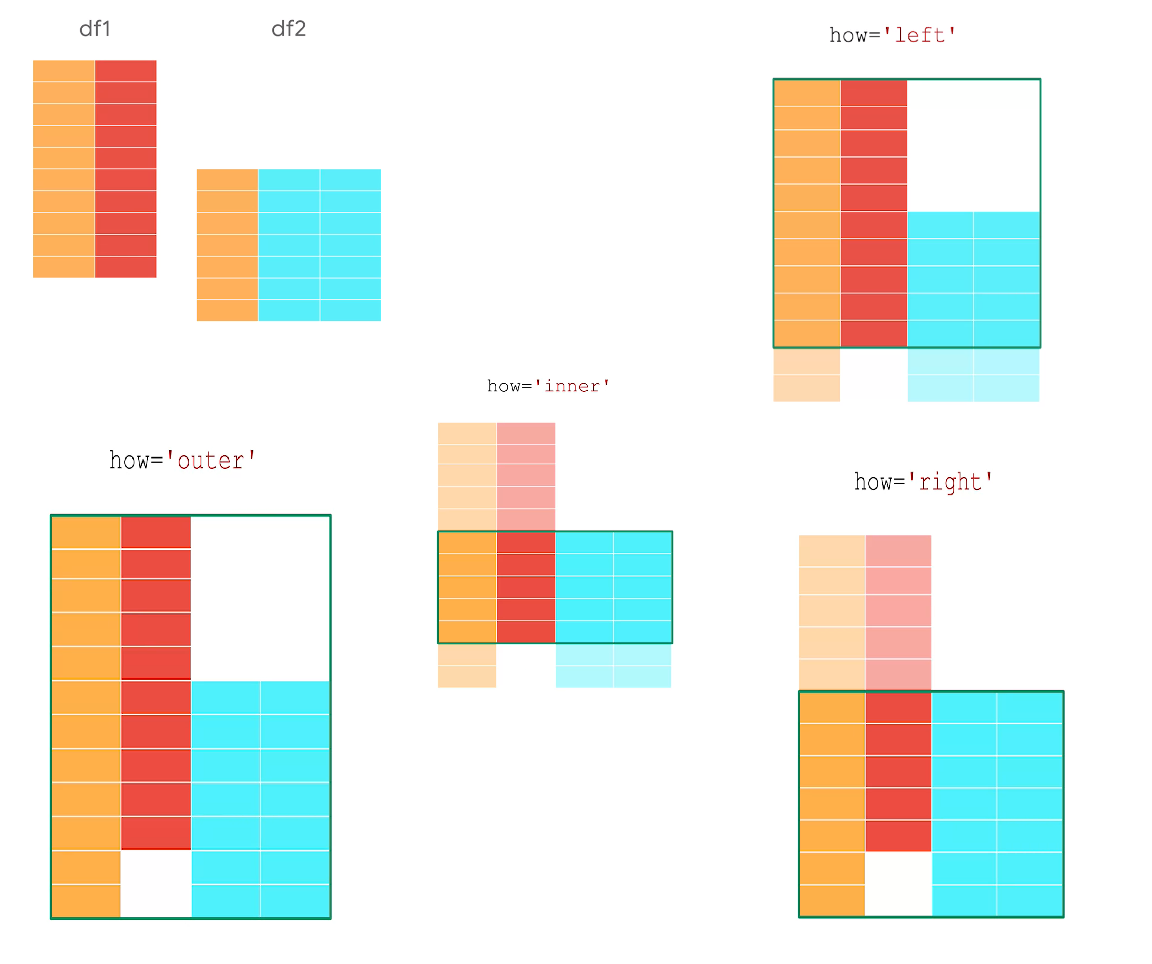

In [11]:
df5 = pd.DataFrame({
    'planet':['Earth','Mars','Jupiter','Saturn','Uranus','Neptune','Janssen','Tadmor'],
    'type':['terrestrial','terrestrial','gas giant','gas giant','ice giant','ice giant', 'super earth','gas giant'],
    'rings':['no','no','yes','yes','yes','yes','no','None'],
    'mean_temp_c':[15.0,-65.0,-110.0,-140.0,-195.0,-200.0,None,None],
    'magnetic_field':['yes','no','yes','yes','yes','yes',None,None],
    'life':[1,0,0,0,0,0,1,1]
})

df5

,planet,type,rings,mean_temp_c,magnetic_field,life
0,Earth,terrestrial,no,15.0,yes,1
1,Mars,terrestrial,no,-65.0,no,0
2,Jupiter,gas giant,yes,-110.0,yes,0
3,Saturn,gas giant,yes,-140.0,yes,0
4,Uranus,ice giant,yes,-195.0,yes,0
5,Neptune,ice giant,yes,-200.0,yes,0
6,Janssen,super earth,no,NaN,None,1
7,Tadmor,gas giant,None,NaN,None,1


In [12]:
inner = pd.merge(df3,df5, how='inner', on='planet')
inner

,planet,radius_km,moons,type,rings,mean_temp_c,magnetic_field,life
0,Earth,6371,1,terrestrial,no,15.0,yes,1
1,Mars,3390,2,terrestrial,no,-65.0,no,0
2,Jupiter,69911,80,gas giant,yes,-110.0,yes,0
3,Saturn,58232,83,gas giant,yes,-140.0,yes,0
4,Uranus,25362,27,ice giant,yes,-195.0,yes,0
5,Neptune,24622,14,ice giant,yes,-200.0,yes,0


In [13]:
outer = pd.merge(df3,df5, how='outer', on='planet')
outer

,planet,radius_km,moons,type,rings,mean_temp_c,magnetic_field,life
0,Mercury,2440.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Venus,6052.0,0.0,NaN,NaN,NaN,NaN,NaN
2,Earth,6371.0,1.0,terrestrial,no,15.0,yes,1.0
3,Mars,3390.0,2.0,terrestrial,no,-65.0,no,0.0
4,Jupiter,69911.0,80.0,gas giant,yes,-110.0,yes,0.0
5,Saturn,58232.0,83.0,gas giant,yes,-140.0,yes,0.0
6,Uranus,25362.0,27.0,ice giant,yes,-195.0,yes,0.0
7,Neptune,24622.0,14.0,ice giant,yes,-200.0,yes,0.0
8,Janssen,NaN,NaN,super earth,no,NaN,None,1.0
9,Tadmor,NaN,NaN,gas giant,None,NaN,None,1.0


In [14]:
left = pd.merge(df3,df5, how='left', on='planet')
left

,planet,radius_km,moons,type,rings,mean_temp_c,magnetic_field,life
0,Mercury,2440,0,NaN,NaN,NaN,NaN,NaN
1,Venus,6052,0,NaN,NaN,NaN,NaN,NaN
2,Earth,6371,1,terrestrial,no,15.0,yes,1.0
3,Mars,3390,2,terrestrial,no,-65.0,no,0.0
4,Jupiter,69911,80,gas giant,yes,-110.0,yes,0.0
5,Saturn,58232,83,gas giant,yes,-140.0,yes,0.0
6,Uranus,25362,27,ice giant,yes,-195.0,yes,0.0
7,Neptune,24622,14,ice giant,yes,-200.0,yes,0.0


In [15]:
right = pd.merge(df3,df5, how='right', on='planet')
right

,planet,radius_km,moons,type,rings,mean_temp_c,magnetic_field,life
0,Earth,6371.0,1.0,terrestrial,no,15.0,yes,1
1,Mars,3390.0,2.0,terrestrial,no,-65.0,no,0
2,Jupiter,69911.0,80.0,gas giant,yes,-110.0,yes,0
3,Saturn,58232.0,83.0,gas giant,yes,-140.0,yes,0
4,Uranus,25362.0,27.0,ice giant,yes,-195.0,yes,0
5,Neptune,24622.0,14.0,ice giant,yes,-200.0,yes,0
6,Janssen,NaN,NaN,super earth,no,NaN,None,1
7,Tadmor,NaN,NaN,gas giant,None,NaN,None,1


# `join()`



In [12]:
import pandas as pd

df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})


other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],'B': ['B0', 'B1', 'B2']})

print(df)
print(other)

  key   A
0  K0  A0
1  K1  A1
2  K2  A2
3  K3  A3
4  K4  A4
5  K5  A5
  key   B
0  K0  B0
1  K1  B1
2  K2  B2


In [13]:
# Join them using their indexes. But if there is same name of columns. We should chang each side's column name
df.join(other, lsuffix='_df', rsuffix="_other")

,key_df,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


In [15]:
# If we want to join the key columns, we need to set key to be the index

df.set_index('key').join(other.set_index('key'))

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,NaN
K4,A4,NaN
K5,A5,NaN


In [16]:
# Or, above code can equal to below code
df.join(other.set_index('key'), on='key')

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN
